In [17]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [19]:
from IPython.display import Markdown

Markdown('[grok](https://grok.com/share/bGVnYWN5_5ae29c65-3c35-4dd2-a201-f8289c17d6c7)')


[grok](https://grok.com/share/bGVnYWN5_5ae29c65-3c35-4dd2-a201-f8289c17d6c7)

In [39]:
dataset = pd.read_csv(r"C:\Users\hegde\Downloads\placement.csv")
dataset.head(3)

,cgpa,package
0,6.89,3.26
1,5.12,1.98
2,7.82,3.25


In [43]:
x=dataset["cgpa"]
x.ndim

1

In [12]:
dataset.isnull().sum()

cgpa       0
package    0
dtype: int64

In [52]:
dataset.describe()

,cgpa,package
count,200.000000,200.000000
mean,6.990500,2.996050
std,1.069409,0.691644
min,4.260000,1.370000
25%,6.190000,2.487500
50%,6.965000,2.995000
75%,7.737500,3.492500
max,9.580000,4.620000


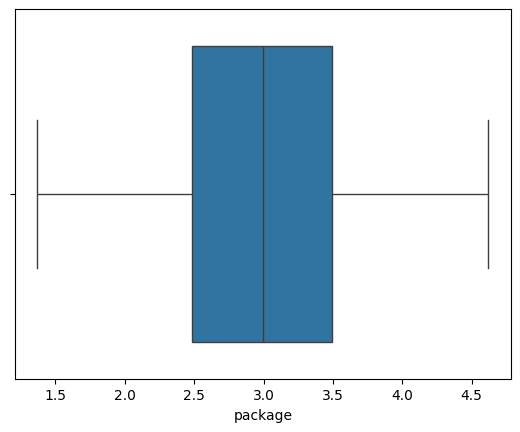

In [23]:
sns.boxplot(x="package",data=dataset)
plt.show()

In [58]:
dataset.shape

(200, 2)

In [76]:
q1=dataset["cgpa"].quantile(0.25)
q3=dataset["cgpa"].quantile(0.75)
IQR=q3-q1
mr=q1-(1.5*IQR)
mar=q3+(1.5*IQR)
mr,mar
nd=dataset[dataset["cgpa"]<=mar]
nd.shape

(200, 2)

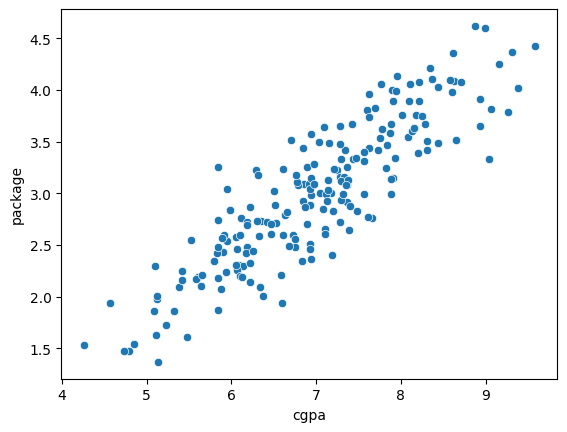

In [25]:
sns.scatterplot(x="cgpa",y="package",data=dataset)
plt.show()

In [36]:
dataset.shape

(200, 2)

In [48]:
dataset.shape

(200, 2)

cgpa       0
package    0
Name: Outlier Count, dtype: int64


In [29]:
x=dataset[["cgpa"]]
y=dataset["package"]

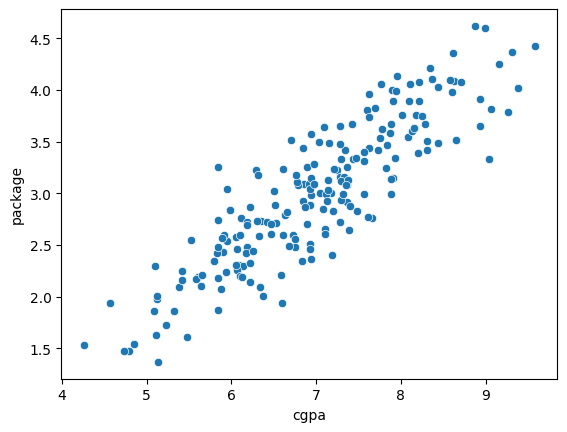

In [78]:
sns.scatterplot(x="cgpa",y="package",data=dataset)
plt.show()

In [27]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.06,random_state=42)

In [86]:
from sklearn.linear_model import LinearRegression

In [29]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [122]:
lr.coef_

array([0.56728537])

In [124]:
lr.intercept_

-0.9759902354422221

In [31]:
lr.score(x_test,y_test)*100

79.02860005537953

In [41]:
lr.predict([[6.89]])

C:\Users\hegde\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([2.9367714])

In [33]:
yp=lr.predict(x)

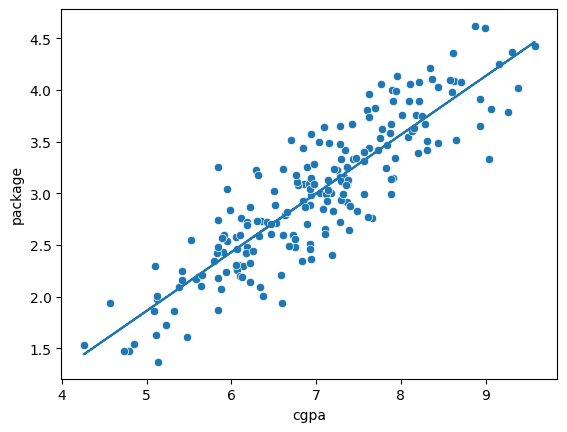

In [39]:
yp=lr.predict(x)
sns.scatterplot(x="cgpa",y="package",data=dataset)
plt.plot(dataset["cgpa"],yp)
plt.show()

In [25]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression

# Load the dataset
dataset = pd.read_csv(r"C:\Users\hegde\Downloads\placement.csv")
x = dataset[["cgpa"]]
y = dataset["package"]

# Define test sizes to evaluate
test_sizes = np.arange(0.1, 0.9, 0.01)
test_scores = []
cv_scores = []

# Evaluate each test size
for test_size in test_sizes:
    # Split the data
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=test_size, random_state=42)
    
    # Train the model
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    
    # Compute test set R² score
    test_score = lr.score(x_test, y_test) * 100
    test_scores.append(test_score)
    
    # Compute 5-fold cross-validation R² score on training set
    cv_score = cross_val_score(lr, x_train, y_train, cv=5, scoring='r2').mean() * 100
    cv_scores.append(cv_score)
    
    print(f"Test Size: {test_size:.2f}, Test R² Score: {test_score:.2f}%, CV R² Score: {cv_score:.2f}%")

# Identify the best test size
best_test_size = test_sizes[np.argmax(test_scores)]
best_score = max(test_scores)

print(f"\nBest Test Size: {best_test_size:.2f} with Test R² Score: {best_score:.2f}%")

Test Size: 0.10, Test R² Score: 73.62%, CV R² Score: 76.77%
Test Size: 0.11, Test R² Score: 72.40%, CV R² Score: 77.05%
Test Size: 0.12, Test R² Score: 72.51%, CV R² Score: 76.95%
Test Size: 0.13, Test R² Score: 73.78%, CV R² Score: 76.91%
Test Size: 0.14, Test R² Score: 77.77%, CV R² Score: 76.81%
Test Size: 0.15, Test R² Score: 78.04%, CV R² Score: 76.57%
Test Size: 0.16, Test R² Score: 78.24%, CV R² Score: 76.38%
Test Size: 0.17, Test R² Score: 77.42%, CV R² Score: 76.78%
Test Size: 0.18, Test R² Score: 77.18%, CV R² Score: 76.75%
Test Size: 0.19, Test R² Score: 77.29%, CV R² Score: 76.64%
Test Size: 0.20, Test R² Score: 77.31%, CV R² Score: 76.69%
Test Size: 0.21, Test R² Score: 77.22%, CV R² Score: 76.80%
Test Size: 0.22, Test R² Score: 78.60%, CV R² Score: 75.53%
Test Size: 0.23, Test R² Score: 78.82%, CV R² Score: 74.96%
Test Size: 0.24, Test R² Score: 77.17%, CV R² Score: 75.24%
Test Size: 0.25, Test R² Score: 77.75%, CV R² Score: 74.96%
Test Size: 0.26, Test R² Score: 77.68%, 

Farthest Point Above the Line:
CGPA: 5.84, Package: 3.26, Residual: 0.92

Farthest Point Below the Line:
CGPA: 6.60, Package: 1.94, Residual: -0.83


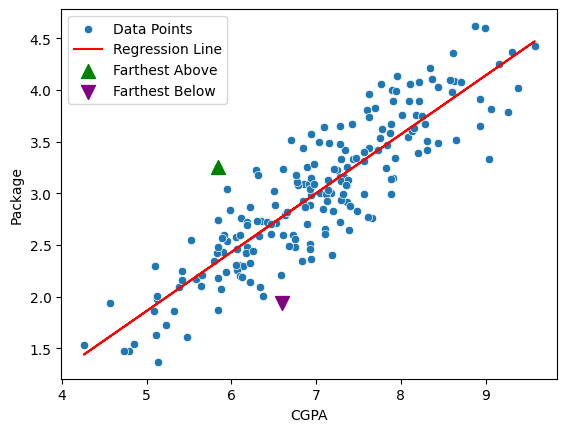

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Load the dataset
dataset = pd.read_csv(r"C:\Users\hegde\Downloads\placement.csv")
x = dataset[["cgpa"]]
y = dataset["package"]

# Fit the linear regression model
lr = LinearRegression()
lr.fit(x, y)

# Predict package values for all cgpa
yp = lr.predict(x)

# Calculate residuals (actual - predicted)
residuals = y - yp

# Find the index of the point farthest above (largest positive residual)
farthest_above_idx = residuals.idxmax()
farthest_above_cgpa = dataset.loc[farthest_above_idx, "cgpa"]
farthest_above_package = dataset.loc[farthest_above_idx, "package"]
farthest_above_residual = residuals[farthest_above_idx]

# Find the index of the point farthest below (largest negative residual)
farthest_below_idx = residuals.idxmin()
farthest_below_cgpa = dataset.loc[farthest_below_idx, "cgpa"]
farthest_below_package = dataset.loc[farthest_below_idx, "package"]
farthest_below_residual = residuals[farthest_below_idx]

# Print the results
print("Farthest Point Above the Line:")
print(f"CGPA: {farthest_above_cgpa:.2f}, Package: {farthest_above_package:.2f}, Residual: {farthest_above_residual:.2f}")
print("\nFarthest Point Below the Line:")
print(f"CGPA: {farthest_below_cgpa:.2f}, Package: {farthest_below_package:.2f}, Residual: {farthest_below_residual:.2f}")

# Plot the scatter plot and regression line
sns.scatterplot(x="cgpa", y="package", data=dataset, label="Data Points")

# Plot the regression line
plt.plot(dataset["cgpa"], yp, color="red", label="Regression Line")

# Highlight the farthest points
plt.scatter(farthest_above_cgpa, farthest_above_package, color="green", s=100, label="Farthest Above", marker="^")
plt.scatter(farthest_below_cgpa, farthest_below_package, color="purple", s=100, label="Farthest Below", marker="v")

# Add labels and legend
plt.xlabel("CGPA")
plt.ylabel("Package")
plt.legend()
plt.show()

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   cgpa     200 non-null    float64
 1   package  200 non-null    float64
dtypes: float64(2)
memory usage: 3.2 KB
None

Missing Values per Column:
cgpa       0
package    0
dtype: int64

Total Rows with Any Missing Values: 0

Non-null Counts for Key Columns:
cgpa: 200
salary: 200

x ndim: 2 Shape: (200, 1)
y ndim: 1 Shape: (200,)

Intercept: -1.0270069374542108
Slope (cgpa): [0.57425647]


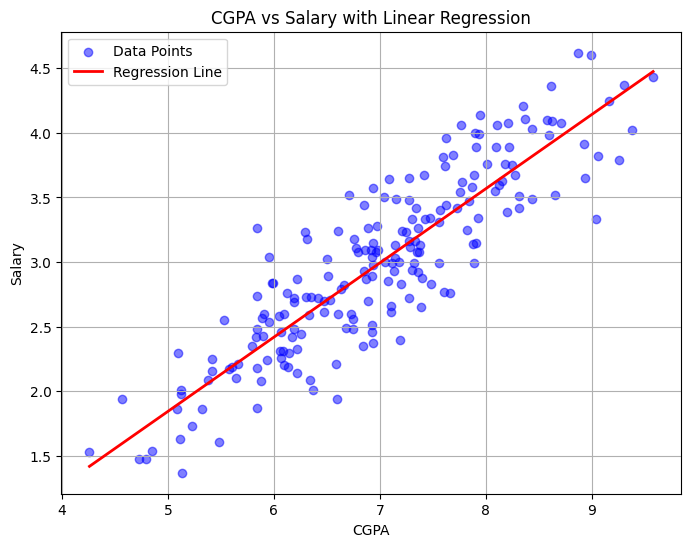

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# Load dataset
dataset = pd.read_csv(r"C:\Users\hegde\Downloads\placement.csv")
# Check for missing data
print("Dataset Info:")
print(dataset.info())
print("\nMissing Values per Column:")
print(dataset.isnull().sum())
print("\nTotal Rows with Any Missing Values:", dataset.isnull().any(axis=1).sum())
print("\nNon-null Counts for Key Columns:")
print("cgpa:", dataset["cgpa"].count())
print("salary:", dataset["package"].count())

# Handle missing data: Drop rows with missing cgpa or salary
dataset_clean = dataset.dropna(subset=["cgpa", "package"])

# Define x and y
x = dataset_clean[["cgpa"]]  # 2D DataFrame (required for LinearRegression)
y = dataset_clean["package"]  # 1D Series

# Check dimensions
print("\nx ndim:", x.ndim, "Shape:", x.shape)
print("y ndim:", y.ndim, "Shape:", y.shape)

# Split data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

# Fit linear regression
lr = LinearRegression()
lr.fit(x_train, y_train)

# Print intercept and slope
print("\nIntercept:", lr.intercept_)
print("Slope (cgpa):", lr.coef_)

# Create scatter plot with regression line
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color="blue", alpha=0.5, label="Data Points")
x_line = pd.DataFrame({"cgpa": [x["cgpa"].min(), x["cgpa"].max()]})
y_line = lr.predict(x_line)
plt.plot(x_line, y_line, color="red", linewidth=2, label="Regression Line")
plt.title("CGPA vs Salary with Linear Regression")
plt.xlabel("CGPA")
plt.ylabel("Salary")
plt.legend()
plt.grid(True)
plt.show()

In [2]:
import os
print(os.getcwd())  # Shows current working directory


C:\Users\hegde
